采样数: 3000
输入聚类个数: 3
1th: (-2.5862767797062616, 3.0914236746610873)
2th: (-1.67705328600927, 3.991429675547595)
3th: (4.175049650922121, 8.615087505393708)


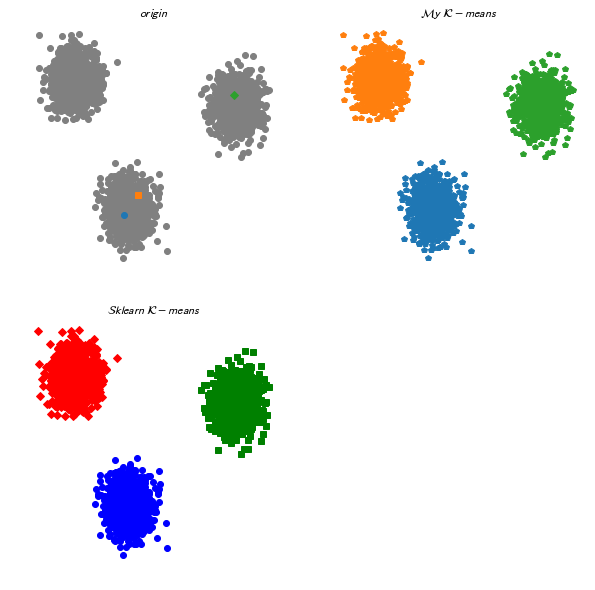

In [292]:
import numpy as np
import matplotlib.pylab as plt
from sklearn.datasets import make_moons, make_blobs

m = np.int(input("采样数: "))
K = np.int(input('输入聚类个数: '))
st = -200
ed = 200
# np.random.seed(0)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'b']
markers = ['o', 's', 'D', 'v', '^', 'p', '*', '+']
# X = np.random.randint(st, ed, m)
# y = np.random.randint(st, ed, m)

# X, y = make_moons(n_samples=m, noise=0.3)
X, y = make_blobs(n_samples=m, cluster_std=0.7, centers=K)
y, X = X[:,1], X[:,0]
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.axis('off')
plt.title(r"$\mathcal{origin}$")
plt.scatter(X, y, c='grey')

shuffled_index = np.random.permutation(m)
muX, muy, C, d = [], [], np.zeros((K, m)), np.zeros((m, K))
    # 初始化向量，簇划分，簇内距离

for k in range(K):
    # nx, ny = ed*np.random.random(), ed*np.random.random()
    nx, ny = X[shuffled_index[k]], y[shuffled_index[k]]
    muX.append(nx); muy.append(ny)
    plt.plot(nx, ny, marker=markers[k])
    print('{}th: ({}, {})'.format(k + 1, nx, ny))

def norm2(x1, y1, x2, y2):
    return (x1 - x2) ** 2 + (y1 - y2) ** 2

for _ in range(K * 200):
    d = np.zeros((m, K))
    C = [[] for i in range(K)]
    for i in range(m):
        for k in range(K):
            d[i][k] = norm2(X[i], y[i], muX[k], muy[k])  # 第i个点到簇中心k的距离
    c = np.argmin(d, axis=1)
    for i in range(m):
        C[c[i]].append(i)
    for idx, Cidx in enumerate(C):
        nX, ny = np.sum(X[C[idx]]) / len(Cidx), np.sum(y[C[idx]]) / len(Cidx)
        muX[idx], muy[idx] = nX, ny 
    
plt.subplot(222)
plt.axis('off')
plt.title(r"$\mathcal{My\ K-means}$")
for k in range(K):
    plt.plot(np.array(X[C[k]]), np.array(y[C[k]]), 'p')
plt.scatter(muX, muy, c=colors[7], marker=markers[6])

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=K)
Xy = np.c_[X,y]
kmeans.fit(Xy)
plt.subplot(223)
plt.axis('off')
plt.title(r"$\mathcal{Sklearn\ K-means}$")
for i, k in enumerate(kmeans.labels_):
    plt.plot(X[i], y[i], color=colors[k], marker=markers[k], ls='None')
plt.show()